# NBA dataset using K-nearest neighbors

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import KFold
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('nba_2013.csv')
df

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,2013-2014,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,Tony Wroten,SG,20,PHI,72,16,1765,345,808,0.427,...,159,228,217,78,16,204,151,939,2013-2014,2013
477,Nick Young,SG,28,LAL,64,9,1810,387,889,0.435,...,137,166,95,46,12,95,156,1144,2013-2014,2013
478,Thaddeus Young,PF,25,PHI,79,78,2718,582,1283,0.454,...,310,476,182,167,36,165,213,1417,2013-2014,2013
479,Cody Zeller,C,21,CHA,82,3,1416,172,404,0.426,...,235,353,92,40,41,87,170,490,2013-2014,2013


In [3]:
df.describe()

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,orb,drb,trb,ast,stl,blk,tov,pf,pts,season_end
count,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,479.000000,481.000000,481.000000,414.000000,...,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.0
mean,26.509356,53.253638,25.571726,1237.386694,192.881497,424.463617,0.436436,39.613306,110.130977,0.285111,...,55.810811,162.817048,218.627859,112.536383,39.280665,24.103950,71.862786,105.869023,516.582121,2013.0
std,4.198265,25.322711,29.658465,897.258840,171.832793,368.850833,0.098672,50.855639,132.751732,0.157633,...,62.101191,145.348116,200.356507,131.019557,34.783590,30.875381,62.701690,71.213627,470.422228,0.0
min,19.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2013.0
25%,23.000000,32.000000,0.000000,388.000000,47.000000,110.000000,0.400500,0.000000,3.000000,0.234355,...,12.000000,43.000000,55.000000,20.000000,9.000000,4.000000,21.000000,44.000000,115.000000,2013.0
50%,26.000000,61.000000,10.000000,1141.000000,146.000000,332.000000,0.438000,16.000000,48.000000,0.330976,...,35.000000,135.000000,168.000000,65.000000,32.000000,14.000000,58.000000,104.000000,401.000000,2013.0
75%,29.000000,76.000000,54.000000,2016.000000,307.000000,672.000000,0.479500,68.000000,193.000000,0.375000,...,73.000000,230.000000,310.000000,152.000000,60.000000,32.000000,108.000000,158.000000,821.000000,2013.0
max,39.000000,83.000000,82.000000,3122.000000,849.000000,1688.000000,1.000000,261.000000,615.000000,1.000000,...,440.000000,783.000000,1114.000000,721.000000,191.000000,219.000000,295.000000,273.000000,2593.000000,2013.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 31 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   player        481 non-null    object 
 1   pos           481 non-null    object 
 2   age           481 non-null    int64  
 3   bref_team_id  481 non-null    object 
 4   g             481 non-null    int64  
 5   gs            481 non-null    int64  
 6   mp            481 non-null    int64  
 7   fg            481 non-null    int64  
 8   fga           481 non-null    int64  
 9   fg.           479 non-null    float64
 10  x3p           481 non-null    int64  
 11  x3pa          481 non-null    int64  
 12  x3p.          414 non-null    float64
 13  x2p           481 non-null    int64  
 14  x2pa          481 non-null    int64  
 15  x2p.          478 non-null    float64
 16  efg.          479 non-null    float64
 17  ft            481 non-null    int64  
 18  fta           481 non-null    

In [5]:
df.isnull().any()

player          False
pos             False
age             False
bref_team_id    False
g               False
gs              False
mp              False
fg              False
fga             False
fg.              True
x3p             False
x3pa            False
x3p.             True
x2p             False
x2pa            False
x2p.             True
efg.             True
ft              False
fta             False
ft.              True
orb             False
drb             False
trb             False
ast             False
stl             False
blk             False
tov             False
pf              False
pts             False
season          False
season_end      False
dtype: bool

In [6]:
#replacing null values with respective column's mean
df['fg.'].fillna(df['fg.'].mean(),inplace=True)
df['x3p.'].fillna(df['x3p.'].mean(),inplace=True)
df['x2p.'].fillna(df['x2p.'].mean(),inplace=True)
df['efg.'].fillna(df['efg.'].mean(),inplace=True)
df['ft.'].fillna(df['ft.'].mean(),inplace=True)

In [7]:
df.isnull().any()

player          False
pos             False
age             False
bref_team_id    False
g               False
gs              False
mp              False
fg              False
fga             False
fg.             False
x3p             False
x3pa            False
x3p.            False
x2p             False
x2pa            False
x2p.            False
efg.            False
ft              False
fta             False
ft.             False
orb             False
drb             False
trb             False
ast             False
stl             False
blk             False
tov             False
pf              False
pts             False
season          False
season_end      False
dtype: bool

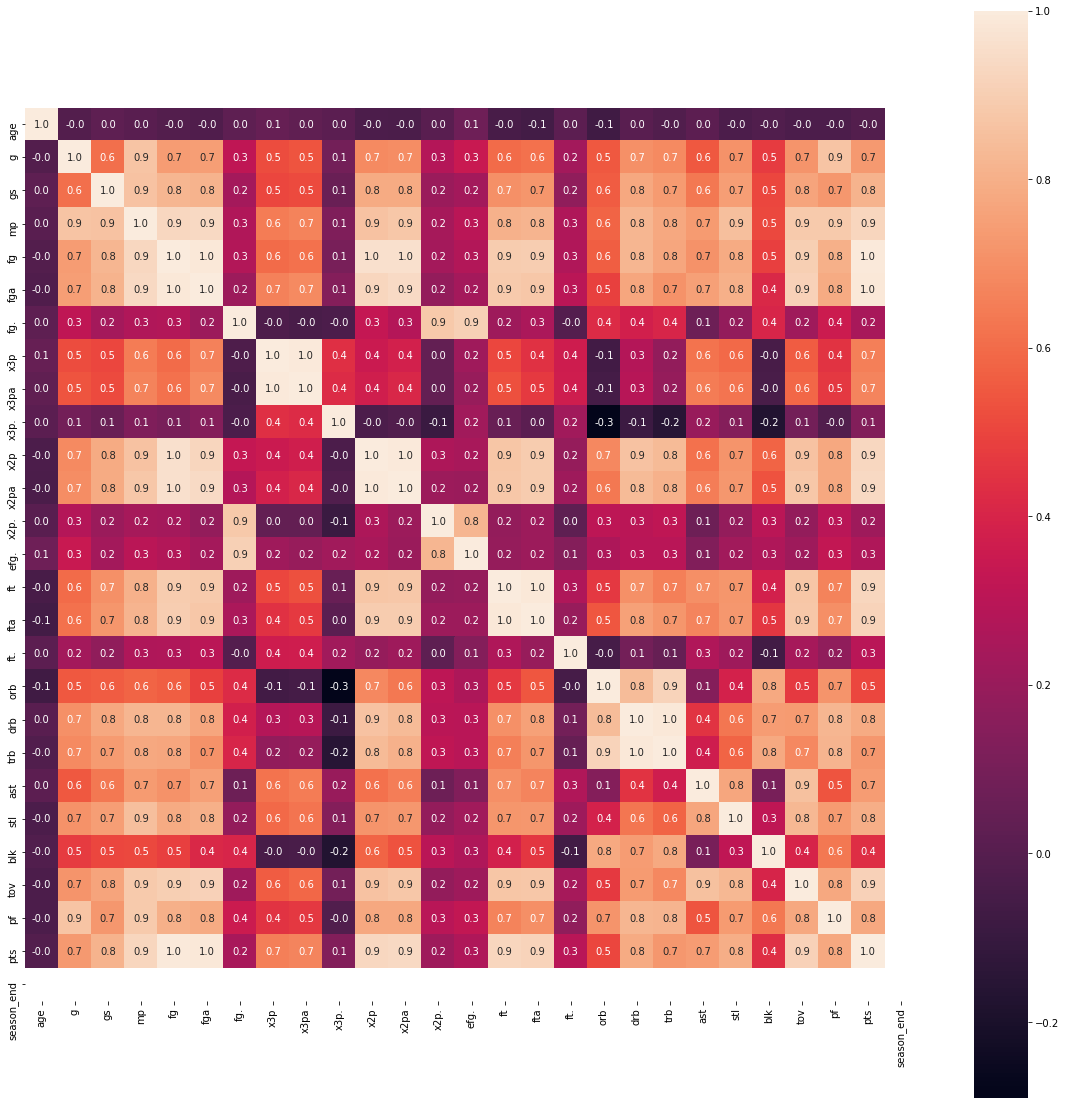

In [63]:
plt.figure(figsize=(20,20))
sns.heatmap(df.select_dtypes(include=['int64','float64']).corr(),square=True,annot=True,fmt='0.1f')

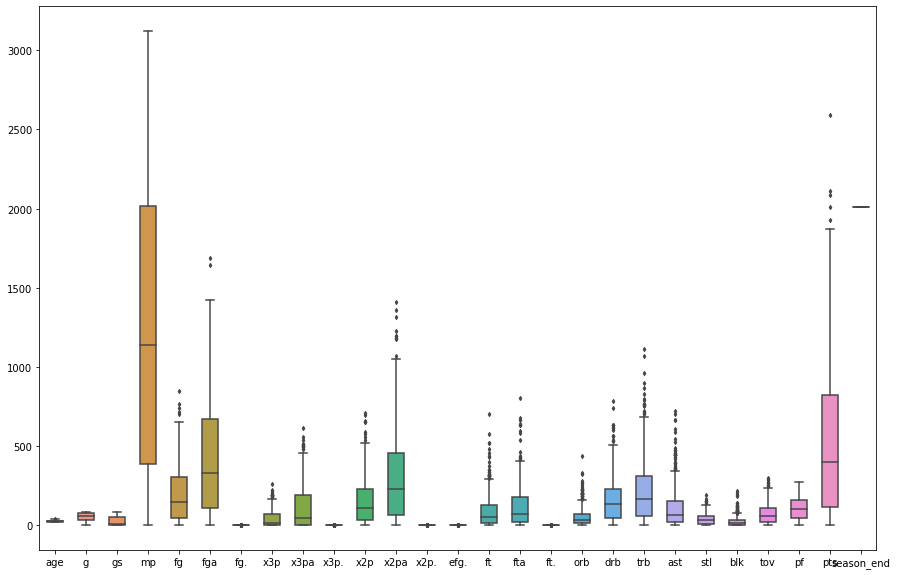

In [8]:

fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=df, width= 0.5,ax=ax,  fliersize=3)

In [84]:
print(df['season'].unique())
print(df['season_end'].unique())
print(df['bref_team_id'].unique())
#print(df['player'].unique())
print(df['pos'].unique())
df1=df.copy()

['2013-2014']
[2013]
['TOT' 'OKC' 'ORL' 'NOP' 'NYK' 'POR' 'MIA' 'MEM' 'BRK' 'PHI' 'MIL' 'ATL'
 'WAS' 'GSW' 'DEN' 'HOU' 'SAS' 'BOS' 'PHO' 'MIN' 'LAC' 'CLE' 'UTA' 'DET'
 'CHA' 'DAL' 'CHI' 'LAL' 'IND' 'TOR' 'SAC']
['SF' 'C' 'PF' 'SG' 'PG' 'G' 'F']


In [85]:
# since season and season_end have only one value, drop it
# since player and bref_team_id are of no use, drop it
df1.drop(['season','season_end','bref_team_id','player'],axis=1,inplace=True)
df1.shape

(481, 27)

In [86]:
df_num_cols=list(df1.columns)
df_num_cols.remove('pts')
df_num_cols.remove('pos')
print(df_num_cols)
len(df_num_cols)

['age', 'g', 'gs', 'mp', 'fg', 'fga', 'fg.', 'x3p', 'x3pa', 'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.', 'ft', 'fta', 'ft.', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf']


25

In [88]:
df_pos=pd.get_dummies(df1['pos'],drop_first=True)
df_pos.shape

(481, 6)

In [95]:
df_num=df1[df_num_cols]
scaled=StandardScaler()
df_num_scaled=scaled.fit_transform(df_num)
df_numeric=pd.DataFrame(df_num_scaled)
df_numeric.shape

(481, 25)

In [97]:
x=pd.concat([df_pos,df_numeric],axis=1)

In [24]:
y=df['pts']

In [103]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [105]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [106]:
knn.score(x_train,y_train)

0.9746424447395812

In [137]:
y_pred=knn.predict(x_test)


In [141]:
from sklearn import metrics
print('R^2:', metrics.r2_score(y_test, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_pred))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R^2: 0.9641335400696384
Adjusted R^2: 0.9516407281837821
MAE: 64.46280991735536
MSE: 8405.748099173556
RMSE: 91.68286698818682


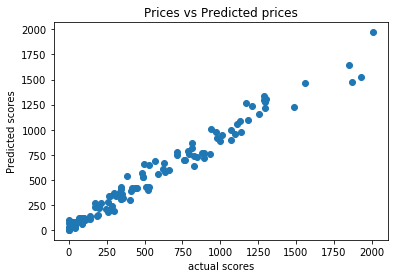

In [142]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("actual scores")
plt.ylabel("Predicted scores")
plt.title("Prices vs Predicted prices")
plt.show()

Text(0.5, 1.0, 'Residual frequencies for test')

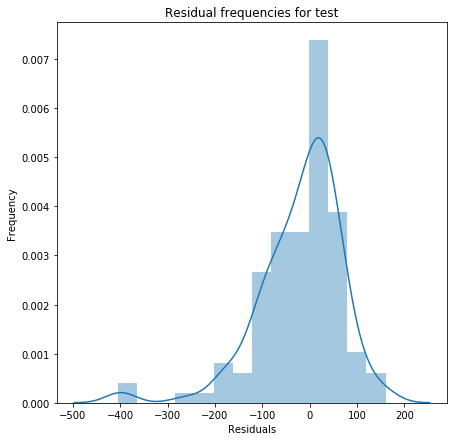

In [143]:
plt.figure(figsize=(7,7))
sns.distplot(y_pred-y_test)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residual frequencies for test')

In [180]:
param_grid = { 'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
               'leaf_size' : [18,20,25,27,30,32,34],
               'n_neighbors' : [3,5,7,9,10,11,12,13]
              }

In [181]:
gridsearch = GridSearchCV(knn, param_grid,verbose=3)

In [182]:
gridsearch.fit(x_train,y_train)

Fitting 5 folds for each of 224 candidates, totalling 1120 fits
[CV] algorithm=auto, leaf_size=18, n_neighbors=3 .....................
[CV]  algorithm=auto, leaf_size=18, n_neighbors=3, score=0.967, total=   0.0s
[CV] algorithm=auto, leaf_size=18, n_neighbors=3 .....................
[CV]  algorithm=auto, leaf_size=18, n_neighbors=3, score=0.949, total=   0.0s
[CV] algorithm=auto, leaf_size=18, n_neighbors=3 .....................
[CV]  algorithm=auto, leaf_size=18, n_neighbors=3, score=0.943, total=   0.0s
[CV] algorithm=auto, leaf_size=18, n_neighbors=3 .....................
[CV]  algorithm=auto, leaf_size=18, n_neighbors=3, score=0.958, total=   0.0s
[CV] algorithm=auto, leaf_size=18, n_neighbors=3 .....................
[CV]  algorithm=auto, leaf_size=18, n_neighbors=3, score=0.959, total=   0.0s
[CV] algorithm=auto, leaf_size=18, n_neighbors=5 .....................
[CV]  algorithm=auto, leaf_size=18, n_neighbors=5, score=0.972, total=   0.0s
[CV] algorithm=auto, leaf_size=18, n_neigh

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  algorithm=auto, leaf_size=18, n_neighbors=12, score=0.960, total=   0.0s
[CV] algorithm=auto, leaf_size=18, n_neighbors=12 ....................
[CV]  algorithm=auto, leaf_size=18, n_neighbors=12, score=0.913, total=   0.0s
[CV] algorithm=auto, leaf_size=18, n_neighbors=13 ....................
[CV]  algorithm=auto, leaf_size=18, n_neighbors=13, score=0.968, total=   0.0s
[CV] algorithm=auto, leaf_size=18, n_neighbors=13 ....................
[CV]  algorithm=auto, leaf_size=18, n_neighbors=13, score=0.934, total=   0.0s
[CV] algorithm=auto, leaf_size=18, n_neighbors=13 ....................
[CV]  algorithm=auto, leaf_size=18, n_neighbors=13, score=0.952, total=   0.0s
[CV] algorithm=auto, leaf_size=18, n_neighbors=13 ....................
[CV]  algorithm=auto, leaf_size=18, n_neighbors=13, score=0.960, total=   0.0s
[CV] algorithm=auto, leaf_size=18, n_neighbors=13 ....................
[CV]  algorithm=auto, leaf_size=18, n_neighbors=13, score=0.909, total=   0.0s
[CV] algorithm=auto, 

[CV]  algorithm=auto, leaf_size=25, n_neighbors=9, score=0.951, total=   0.0s
[CV] algorithm=auto, leaf_size=25, n_neighbors=9 .....................
[CV]  algorithm=auto, leaf_size=25, n_neighbors=9, score=0.964, total=   0.0s
[CV] algorithm=auto, leaf_size=25, n_neighbors=9 .....................
[CV]  algorithm=auto, leaf_size=25, n_neighbors=9, score=0.930, total=   0.0s
[CV] algorithm=auto, leaf_size=25, n_neighbors=10 ....................
[CV]  algorithm=auto, leaf_size=25, n_neighbors=10, score=0.970, total=   0.0s
[CV] algorithm=auto, leaf_size=25, n_neighbors=10 ....................
[CV]  algorithm=auto, leaf_size=25, n_neighbors=10, score=0.938, total=   0.0s
[CV] algorithm=auto, leaf_size=25, n_neighbors=10 ....................
[CV]  algorithm=auto, leaf_size=25, n_neighbors=10, score=0.947, total=   0.0s
[CV] algorithm=auto, leaf_size=25, n_neighbors=10 ....................
[CV]  algorithm=auto, leaf_size=25, n_neighbors=10, score=0.963, total=   0.0s
[CV] algorithm=auto, lea

[CV]  algorithm=auto, leaf_size=30, n_neighbors=3, score=0.958, total=   0.0s
[CV] algorithm=auto, leaf_size=30, n_neighbors=3 .....................
[CV]  algorithm=auto, leaf_size=30, n_neighbors=3, score=0.959, total=   0.0s
[CV] algorithm=auto, leaf_size=30, n_neighbors=5 .....................
[CV]  algorithm=auto, leaf_size=30, n_neighbors=5, score=0.972, total=   0.0s
[CV] algorithm=auto, leaf_size=30, n_neighbors=5 .....................
[CV]  algorithm=auto, leaf_size=30, n_neighbors=5, score=0.955, total=   0.0s
[CV] algorithm=auto, leaf_size=30, n_neighbors=5 .....................
[CV]  algorithm=auto, leaf_size=30, n_neighbors=5, score=0.946, total=   0.0s
[CV] algorithm=auto, leaf_size=30, n_neighbors=5 .....................
[CV]  algorithm=auto, leaf_size=30, n_neighbors=5, score=0.959, total=   0.0s
[CV] algorithm=auto, leaf_size=30, n_neighbors=5 .....................
[CV]  algorithm=auto, leaf_size=30, n_neighbors=5, score=0.941, total=   0.0s
[CV] algorithm=auto, leaf_si

[CV]  algorithm=auto, leaf_size=32, n_neighbors=11, score=0.918, total=   0.0s
[CV] algorithm=auto, leaf_size=32, n_neighbors=12 ....................
[CV]  algorithm=auto, leaf_size=32, n_neighbors=12, score=0.966, total=   0.0s
[CV] algorithm=auto, leaf_size=32, n_neighbors=12 ....................
[CV]  algorithm=auto, leaf_size=32, n_neighbors=12, score=0.938, total=   0.0s
[CV] algorithm=auto, leaf_size=32, n_neighbors=12 ....................
[CV]  algorithm=auto, leaf_size=32, n_neighbors=12, score=0.952, total=   0.0s
[CV] algorithm=auto, leaf_size=32, n_neighbors=12 ....................
[CV]  algorithm=auto, leaf_size=32, n_neighbors=12, score=0.960, total=   0.0s
[CV] algorithm=auto, leaf_size=32, n_neighbors=12 ....................
[CV]  algorithm=auto, leaf_size=32, n_neighbors=12, score=0.913, total=   0.0s
[CV] algorithm=auto, leaf_size=32, n_neighbors=13 ....................
[CV]  algorithm=auto, leaf_size=32, n_neighbors=13, score=0.968, total=   0.0s
[CV] algorithm=auto, 

[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=9, score=0.944, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=9 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=9, score=0.951, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=9 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=9, score=0.964, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=9 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=9, score=0.930, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=10 ...............
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=10, score=0.970, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=10 ...............
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=10, score=0.938, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=10 ...............
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=10, score=0.947, tota

[CV]  algorithm=ball_tree, leaf_size=25, n_neighbors=7, score=0.954, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=25, n_neighbors=7 ................
[CV]  algorithm=ball_tree, leaf_size=25, n_neighbors=7, score=0.959, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=25, n_neighbors=7 ................
[CV]  algorithm=ball_tree, leaf_size=25, n_neighbors=7, score=0.934, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=25, n_neighbors=9 ................
[CV]  algorithm=ball_tree, leaf_size=25, n_neighbors=9, score=0.971, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=25, n_neighbors=9 ................
[CV]  algorithm=ball_tree, leaf_size=25, n_neighbors=9, score=0.944, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=25, n_neighbors=9 ................
[CV]  algorithm=ball_tree, leaf_size=25, n_neighbors=9, score=0.951, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=25, n_neighbors=9 ................
[CV]  algorithm=ball_tree, leaf_size=25, n_neighbors=9, score=0.964, total= 

[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=5, score=0.955, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=5, score=0.946, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=5, score=0.959, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=5, score=0.941, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=7 ................
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=7, score=0.975, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=7 ................
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=7, score=0.947, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=7 ................
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=7, score=0.954, total= 

[CV]  algorithm=ball_tree, leaf_size=34, n_neighbors=3, score=0.949, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=34, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=34, n_neighbors=3, score=0.943, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=34, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=34, n_neighbors=3, score=0.958, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=34, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=34, n_neighbors=3, score=0.959, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=34, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=34, n_neighbors=5, score=0.972, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=34, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=34, n_neighbors=5, score=0.955, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=34, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=34, n_neighbors=5, score=0.946, total= 

[CV]  algorithm=kd_tree, leaf_size=18, n_neighbors=12, score=0.952, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=18, n_neighbors=12 .................
[CV]  algorithm=kd_tree, leaf_size=18, n_neighbors=12, score=0.960, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=18, n_neighbors=12 .................
[CV]  algorithm=kd_tree, leaf_size=18, n_neighbors=12, score=0.913, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=18, n_neighbors=13 .................
[CV]  algorithm=kd_tree, leaf_size=18, n_neighbors=13, score=0.968, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=18, n_neighbors=13 .................
[CV]  algorithm=kd_tree, leaf_size=18, n_neighbors=13, score=0.934, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=18, n_neighbors=13 .................
[CV]  algorithm=kd_tree, leaf_size=18, n_neighbors=13, score=0.952, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=18, n_neighbors=13 .................
[CV]  algorithm=kd_tree, leaf_size=18, n_neighbors=13, score=0.960, total=   0.0s


[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=9, score=0.964, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=25, n_neighbors=9 ..................
[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=9, score=0.930, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=25, n_neighbors=10 .................
[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=10, score=0.970, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=25, n_neighbors=10 .................
[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=10, score=0.938, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=25, n_neighbors=10 .................
[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=10, score=0.947, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=25, n_neighbors=10 .................
[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=10, score=0.963, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=25, n_neighbors=10 .................
[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=10, score=0.924, total=   0.0s
[C

[CV]  algorithm=kd_tree, leaf_size=27, n_neighbors=13, score=0.960, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=27, n_neighbors=13 .................
[CV]  algorithm=kd_tree, leaf_size=27, n_neighbors=13, score=0.909, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=3 ..................
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=3, score=0.967, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=3 ..................
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=3, score=0.949, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=3 ..................
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=3, score=0.943, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=3 ..................
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=3, score=0.958, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=3 ..................
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=3, score=0.959, total=   0.0s
[CV] 

[CV]  algorithm=kd_tree, leaf_size=32, n_neighbors=10, score=0.963, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=32, n_neighbors=10 .................
[CV]  algorithm=kd_tree, leaf_size=32, n_neighbors=10, score=0.924, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=32, n_neighbors=11 .................
[CV]  algorithm=kd_tree, leaf_size=32, n_neighbors=11, score=0.969, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=32, n_neighbors=11 .................
[CV]  algorithm=kd_tree, leaf_size=32, n_neighbors=11, score=0.939, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=32, n_neighbors=11 .................
[CV]  algorithm=kd_tree, leaf_size=32, n_neighbors=11, score=0.951, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=32, n_neighbors=11 .................
[CV]  algorithm=kd_tree, leaf_size=32, n_neighbors=11, score=0.960, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=32, n_neighbors=11 .................
[CV]  algorithm=kd_tree, leaf_size=32, n_neighbors=11, score=0.918, total=   0.0s


[CV]  algorithm=brute, leaf_size=18, n_neighbors=7, score=0.959, total=   0.0s
[CV] algorithm=brute, leaf_size=18, n_neighbors=7 ....................
[CV]  algorithm=brute, leaf_size=18, n_neighbors=7, score=0.934, total=   0.0s
[CV] algorithm=brute, leaf_size=18, n_neighbors=9 ....................
[CV]  algorithm=brute, leaf_size=18, n_neighbors=9, score=0.971, total=   0.0s
[CV] algorithm=brute, leaf_size=18, n_neighbors=9 ....................
[CV]  algorithm=brute, leaf_size=18, n_neighbors=9, score=0.944, total=   0.0s
[CV] algorithm=brute, leaf_size=18, n_neighbors=9 ....................
[CV]  algorithm=brute, leaf_size=18, n_neighbors=9, score=0.951, total=   0.0s
[CV] algorithm=brute, leaf_size=18, n_neighbors=9 ....................
[CV]  algorithm=brute, leaf_size=18, n_neighbors=9, score=0.964, total=   0.0s
[CV] algorithm=brute, leaf_size=18, n_neighbors=9 ....................
[CV]  algorithm=brute, leaf_size=18, n_neighbors=9, score=0.930, total=   0.0s
[CV] algorithm=brute,

[CV]  algorithm=brute, leaf_size=25, n_neighbors=9, score=0.951, total=   0.0s
[CV] algorithm=brute, leaf_size=25, n_neighbors=9 ....................
[CV]  algorithm=brute, leaf_size=25, n_neighbors=9, score=0.964, total=   0.0s
[CV] algorithm=brute, leaf_size=25, n_neighbors=9 ....................
[CV]  algorithm=brute, leaf_size=25, n_neighbors=9, score=0.930, total=   0.0s
[CV] algorithm=brute, leaf_size=25, n_neighbors=10 ...................
[CV]  algorithm=brute, leaf_size=25, n_neighbors=10, score=0.970, total=   0.0s
[CV] algorithm=brute, leaf_size=25, n_neighbors=10 ...................
[CV]  algorithm=brute, leaf_size=25, n_neighbors=10, score=0.938, total=   0.0s
[CV] algorithm=brute, leaf_size=25, n_neighbors=10 ...................
[CV]  algorithm=brute, leaf_size=25, n_neighbors=10, score=0.947, total=   0.0s
[CV] algorithm=brute, leaf_size=25, n_neighbors=10 ...................
[CV]  algorithm=brute, leaf_size=25, n_neighbors=10, score=0.963, total=   0.0s
[CV] algorithm=br

[CV]  algorithm=brute, leaf_size=30, n_neighbors=10, score=0.970, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=10 ...................
[CV]  algorithm=brute, leaf_size=30, n_neighbors=10, score=0.938, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=10 ...................
[CV]  algorithm=brute, leaf_size=30, n_neighbors=10, score=0.947, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=10 ...................
[CV]  algorithm=brute, leaf_size=30, n_neighbors=10, score=0.963, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=10 ...................
[CV]  algorithm=brute, leaf_size=30, n_neighbors=10, score=0.924, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=11 ...................
[CV]  algorithm=brute, leaf_size=30, n_neighbors=11, score=0.969, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=11 ...................
[CV]  algorithm=brute, leaf_size=30, n_neighbors=11, score=0.939, total=   0.0s
[CV] algorithm

[CV]  algorithm=brute, leaf_size=34, n_neighbors=12, score=0.952, total=   0.0s
[CV] algorithm=brute, leaf_size=34, n_neighbors=12 ...................
[CV]  algorithm=brute, leaf_size=34, n_neighbors=12, score=0.960, total=   0.0s
[CV] algorithm=brute, leaf_size=34, n_neighbors=12 ...................
[CV]  algorithm=brute, leaf_size=34, n_neighbors=12, score=0.913, total=   0.0s
[CV] algorithm=brute, leaf_size=34, n_neighbors=13 ...................
[CV]  algorithm=brute, leaf_size=34, n_neighbors=13, score=0.968, total=   0.0s
[CV] algorithm=brute, leaf_size=34, n_neighbors=13 ...................
[CV]  algorithm=brute, leaf_size=34, n_neighbors=13, score=0.934, total=   0.0s
[CV] algorithm=brute, leaf_size=34, n_neighbors=13 ...................
[CV]  algorithm=brute, leaf_size=34, n_neighbors=13, score=0.952, total=   0.0s
[CV] algorithm=brute, leaf_size=34, n_neighbors=13 ...................
[CV]  algorithm=brute, leaf_size=34, n_neighbors=13, score=0.960, total=   0.0s
[CV] algorithm

[Parallel(n_jobs=1)]: Done 1120 out of 1120 | elapsed:    5.8s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [18, 20, 25, 27, 30, 32, 34],
                         'n_neighbors': [3, 5, 7, 9, 10, 11, 12, 13]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [183]:
grid_params=gridsearch.best_params_
grid_params

{'algorithm': 'auto', 'leaf_size': 18, 'n_neighbors': 3}

In [184]:
knn = KNeighborsRegressor(**grid_params)
knn.fit(x_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=18, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [185]:
knn.score(x_train,y_train)

0.979158462866995

In [186]:
y_pred=knn.predict(x_test)
print('R^2:', metrics.r2_score(y_test, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_pred))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R^2: 0.9558077103348449
Adjusted R^2: 0.9404148903391167
MAE: 71.39669421487604
MSE: 10357.009182736452
RMSE: 101.76939217041857
